In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("../input"))
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

['train_2019.csv', 'selected_train.csv', 'train_all_2015_and_2019.csv', 'image_info.csv', 'train_2015.csv', 'test.csv', '.ipynb_checkpoints', 'test_2019.csv', 'train.csv', 'sample_submission.csv', 'sampled_train.csv', 'removed_train_2019.csv', 'duplicated_info.csv', 'train_images', 'test_images', 'aptos2019-blindness-detection']


In [2]:
INPUT_PATH = Path("../input").resolve()

In [3]:
train_2019 = pd.read_csv(INPUT_PATH / "train_2019.csv")
train_2015 = pd.read_csv(INPUT_PATH / "train_2015.csv")
test_2019 = pd.read_csv(INPUT_PATH / "test_2019.csv")
image_info = pd.read_csv(INPUT_PATH / "image_info.csv")
duplicated_info = pd.read_csv(INPUT_PATH / "duplicated_info.csv")

In [4]:
duplicated_info["id_code"] = [file_path.split("/")[-1].split(".")[0] for file_path in duplicated_info["path"]]
display(duplicated_info["diagnosis"].value_counts())

0    152
2     78
1     27
4     23
3     17
Name: diagnosis, dtype: int64

In [5]:
removed_train_2019 = train_2019.query("id_code not in {}".format(list(duplicated_info["id_code"])))

In [6]:
for i in range(5):
    print("{}: {}".format(i, len(removed_train_2019.query(f"diagnosis == {i}"))))

0: 1768
1: 318
2: 863
3: 163
4: 253


In [7]:
print(len(train_2019))
print(len(removed_train_2019))

3662
3365


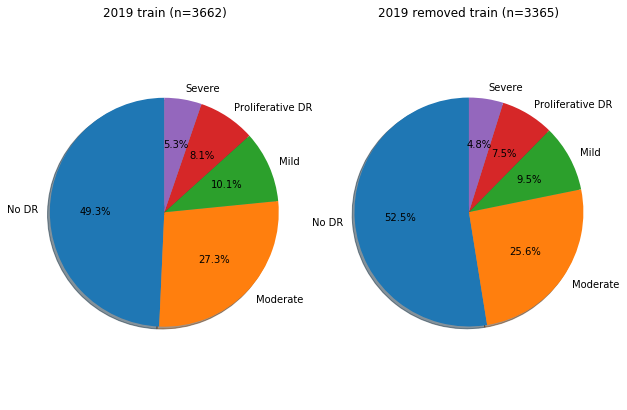

In [8]:
# Plot pie chart
labels = 'No DR', 'Moderate', 'Mild', 'Proliferative DR', 'Severe'
fig1, (axL, axR) = plt.subplots(ncols=2, figsize=(10,7))
axL.pie(train_2019.diagnosis.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axL.axis('equal')
axL.set_title(f"2019 train (n={len(train_2019)})")

axR.pie(removed_train_2019.diagnosis.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axR.axis('equal')
axR.set_title(f"2019 removed train (n={len(removed_train_2019)})")

plt.show()

In [41]:
removed_train_2019.to_csv(INPUT_PATH / "removed_train_2019.csv", index=False)

In [9]:
augmented_train = removed_train_2019.copy()
augmented_train["is_2019"] = True
train_2015["is_2019"] = False

In [10]:
all_train = augmented_train.append(train_2015)

In [61]:
all_train.to_csv(INPUT_PATH / "train_all_2015_and_2019.csv", index=False)

In [11]:
print(train_2015.head())
print(len(train_2015.query("diagnosis != 0")))
select_train = augmented_train.append(train_2015.query("diagnosis != 0"))

for i in range(5):
    print("{}: {}".format(i, len(select_train.query(f"diagnosis == {i}"))))

    id_code  diagnosis       size_info  is_2019
0   10_left          0  (683, 1024, 3)    False
1  10_right          0  (683, 1024, 3)    False
2   13_left          0  (768, 1024, 3)    False
3  13_right          0  (768, 1024, 3)    False
4   15_left          1  (679, 1024, 3)    False
9316
0: 1768
1: 2761
2: 6155
3: 1036
4: 961


In [20]:
select_train.to_csv(INPUT_PATH / "selected_train.csv", index=False)

original
- 0: 1768
- 1: 318
- 2: 863
- 3: 163
- 4: 253

In [14]:
nonzero_train = all_train.query("diagnosis != 0")

print(nonzero_train.head(10))
for i in range(5):
    print("{}: {}".format(i, len(nonzero_train.query(f"diagnosis == {i}"))))

         id_code  diagnosis        size_info  is_2019
0   000c1434d8d7          2  (2136, 3216, 3)     True
1   001639a390f0          4  (2136, 3216, 3)     True
2   0024cdab0c1e          1  (1736, 2416, 3)     True
5   0083ee8054ee          4  (2588, 3388, 3)     True
7   00a8624548a9          2  (2136, 3216, 3)     True
8   00b74780d31d          2  (1958, 2588, 3)     True
11  00e4ddff966a          2  (1736, 2416, 3)     True
13  0104b032c141          3  (1736, 2416, 3)     True
14  0124dffecf29          1  (2136, 3216, 3)     True
20  0180bfa26c0b          2  (1226, 1844, 3)     True
0: 0
1: 2761
2: 6155
3: 1036
4: 961


In [15]:
nonzero_train.to_csv(INPUT_PATH / "nonzero_train.csv", index=False)

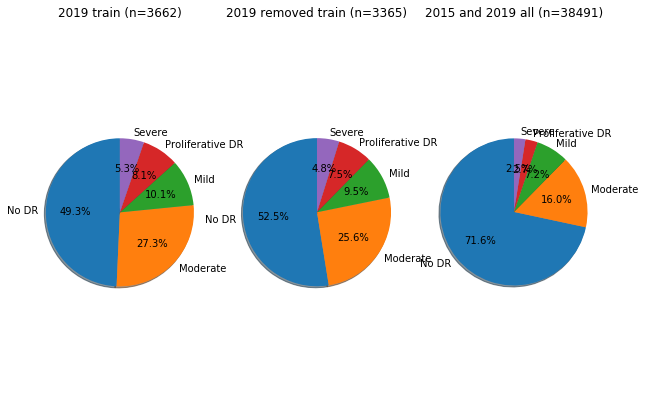

In [74]:
labels = 'No DR', 'Moderate', 'Mild', 'Proliferative DR', 'Severe'
fig1, (axL, axR, axAll) = plt.subplots(ncols=3, figsize=(10,7))
axL.pie(train_2019.diagnosis.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axL.axis('equal')
axL.set_title(f"2019 train (n={len(train_2019)})")

axR.pie(removed_train_2019.diagnosis.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axR.axis('equal')
axR.set_title(f"2019 removed train (n={len(removed_train_2019)})")

axAll.pie(all_train.diagnosis.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axAll.axis('equal')
axAll.set_title(f"2015 and 2019 all (n={len(all_train)})")

plt.show()

In [75]:
num0 = len(removed_train_2019.query("diagnosis==0"))
num1 = len(removed_train_2019.query("diagnosis==1"))
num2 = len(removed_train_2019.query("diagnosis==2"))
num3 = len(removed_train_2019.query("diagnosis==3"))
num4 = len(removed_train_2019.query("diagnosis==4"))
label1_df = train_2015.query("diagnosis==1").sample(n=min(num0-num1, len(train_2015.query("diagnosis==1"))), random_state=1116)
label2_df = train_2015.query("diagnosis==2").sample(n=min(num0-num2, len(train_2015.query("diagnosis==2"))), random_state=1116)
label3_df = train_2015.query("diagnosis==3").sample(n=min(num0-num3, len(train_2015.query("diagnosis==3"))), random_state=1116)
label4_df = train_2015.query("diagnosis==4").sample(n=min(num0-num4, len(train_2015.query("diagnosis==4"))), random_state=1116)

In [76]:
print(len(label1_df))
print(len(label2_df))
print(len(label3_df))
print(len(label4_df))

1450
905
873
708


In [81]:
augmented_train = augmented_train.append(label1_df)
augmented_train = augmented_train.append(label2_df)
augmented_train = augmented_train.append(label3_df)
augmented_train = augmented_train.append(label4_df)

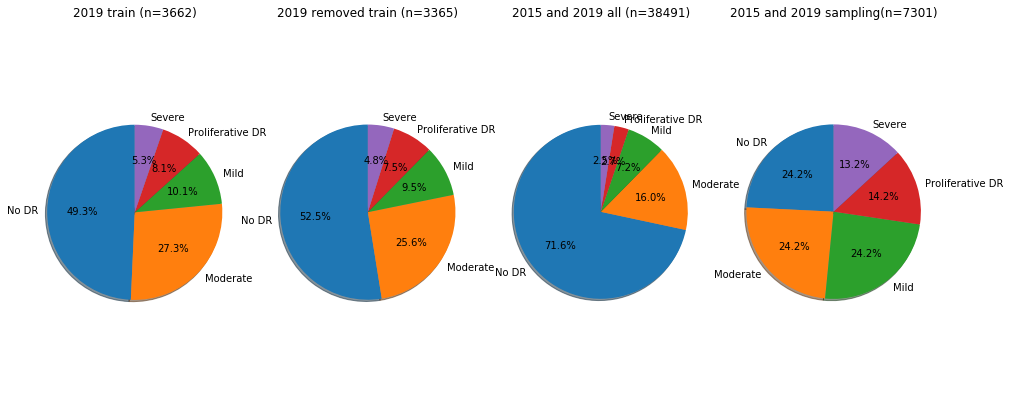

In [83]:
labels = 'No DR', 'Moderate', 'Mild', 'Proliferative DR', 'Severe'
fig1, (axL, axR, axAll, axSampling) = plt.subplots(ncols=4, figsize=(16,7))
axL.pie(train_2019.diagnosis.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axL.axis('equal')
axL.set_title(f"2019 train (n={len(train_2019)})")

axR.pie(removed_train_2019.diagnosis.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axR.axis('equal')
axR.set_title(f"2019 removed train (n={len(removed_train_2019)})")

axAll.pie(all_train.diagnosis.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axAll.axis('equal')
axAll.set_title(f"2015 and 2019 all (n={len(all_train)})")

axSampling.pie(augmented_train.diagnosis.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axSampling.axis('equal')
axSampling.set_title(f"2015 and 2019 sampling(n={len(augmented_train)})")

plt.show()

In [84]:
augmented_train.to_csv(INPUT_PATH / "sampled_train.csv", index=False)